### Analysing my own runs

#### Importing libraries

In [2]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


### Reading the data

- Get rid of unnecesary columns
- Wrangle columns and put in adequate types



In [3]:
# read the data
data_runs = pd.read_csv("C:\\Users\\JuanCarlosSaraviaDra\\Dropbox\\Garmin\\Activities_07082024.csv", sep = ";")

# Extract only the columns that will be used
data_runs = data_runs[['Activity Type', 'Date', 'Distance', 'Calories', 'Time', 'Avg HR', 'Max HR', 'Avg Run Cadence', 'Max Run Cadence', 'Avg Pace', 'Best Pace', 'Total Ascent', 'Total Descent', 'Avg Stride Length', 'Number of Laps', 'Moving Time', 'Elapsed Time',  'Min Elevation', 'Max Elevation']]

# Filter only the usefull activities
data_runs = data_runs[data_runs['Activity Type'].str.contains("Running", na = False)]
data_runs = data_runs[~data_runs['Activity Type'].str.contains("Indoor Running", na = False)]

# Get rid of the dashes
data_runs.replace('--', np.nan, inplace=True)

# Change values into right format in this case numeric
columns = ['Distance','Calories', 'Avg HR', 'Max HR', 'Avg Run Cadence', 'Max Run Cadence', 'Total Ascent','Total Descent', 'Avg Stride Length', 'Number of Laps', 'Min Elevation', 'Max Elevation']

# Change to numeric           
data_runs[columns] = data_runs[columns].apply(pd.to_numeric, errors='coerce', axis = 1)

# Get the values for date format
columns_date_time = ['Date', 'Time', 'Moving Time', 'Elapsed Time']

# Change to datetime
data_runs[columns_date_time] = data_runs[columns_date_time].apply(pd.to_datetime, format = 'mixed',
                                                                  errors='coerce', axis = 1)

# Change type Pace for minutes and seconds
columns_Pace = ['Avg Pace', 'Best Pace']

# Change to minutes and seconds
data_runs[columns_Pace] = data_runs[columns_Pace].apply(pd.to_datetime, format = '%M:%S', errors = 'coerce',
                                                        axis = 1) 

data_runs['Avg Pace_min'] = data_runs['Avg Pace'].dt.time

data_runs['time_in_minutes'] = data_runs['Avg Pace_min'].apply(lambda x: x.minute + x.second / 60.0 + x.hour * 60)

data_runs.to_csv("")


### Creating graphs of distance

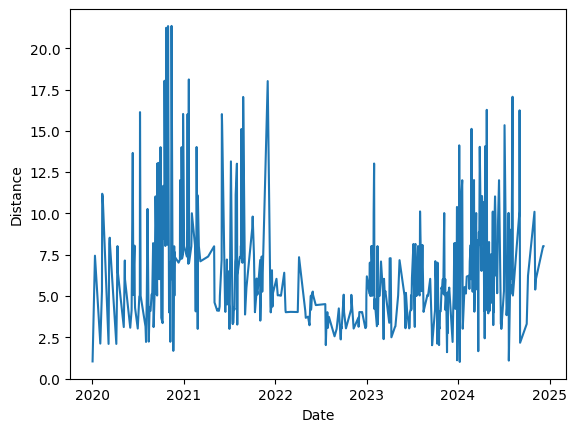

In [5]:
ax0 = sn.lineplot(x='Date', y='Distance', data=data_runs)

### Creating average cadence per date

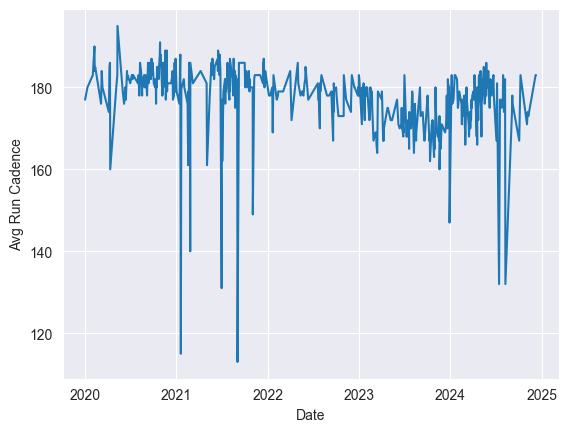

In [17]:
ax0 = sn.lineplot(x='Date', y='Avg Run Cadence', data=data_runs)

### Creating average heart rate per date

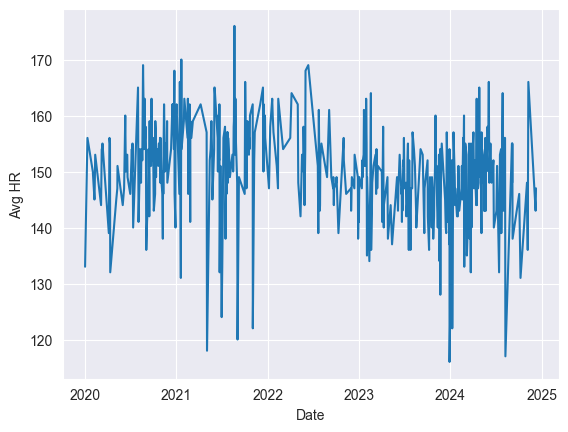

In [19]:
ax0 = sn.lineplot(x='Date', y='Avg HR', data=data_runs)

### Scatter plot of distance and average heart rate

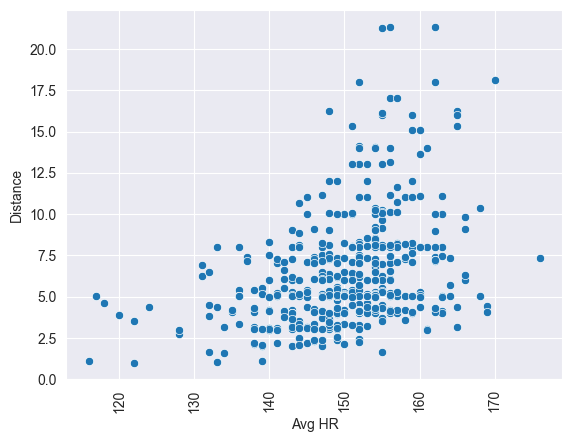

In [16]:
ax1 = sn.scatterplot(x="Avg HR",
                    y="Distance",
                    data=data_runs)
ax1.tick_params(axis='x', labelrotation=90)

### Scatter plot of average heart rate and calories

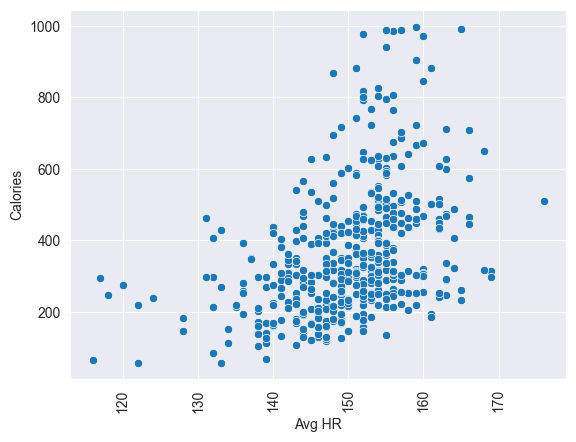

In [12]:
ax1 = sn.scatterplot(x="Avg HR",
                    y="Calories",
                    data=data_runs)
ax1.tick_params(axis='x', labelrotation=90)

### Scatterplot of average and cadence and heart rate

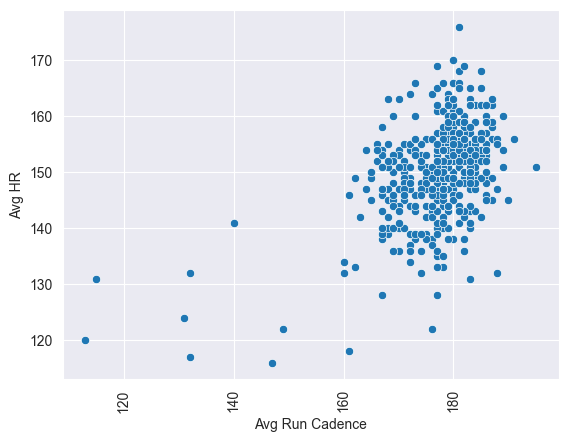

In [13]:
ax2 = sn.scatterplot(x="Avg Run Cadence",
                    y="Avg HR",
                    data=data_runs)
ax2.tick_params(axis='x', labelrotation=90)

### Hex of cadence and heart rate

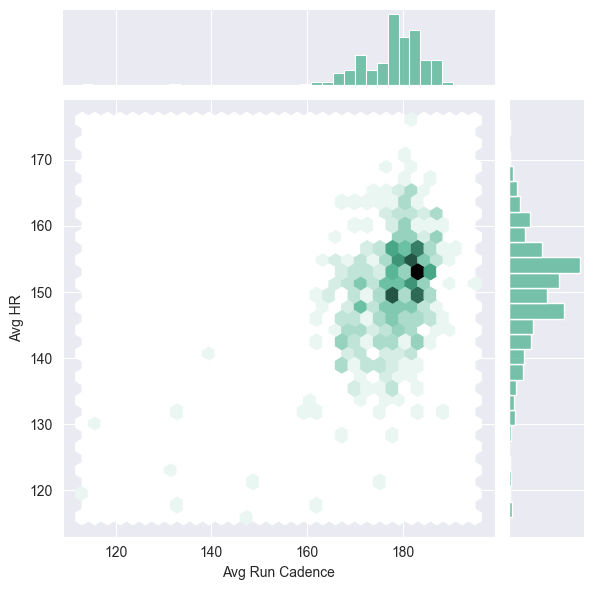

In [14]:
ax3 = sn.jointplot(x="Avg Run Cadence", y="Avg HR",
             data= data_runs, kind="hex", color="#4CB391")

ax2 = sn.scatterplot(x="Calories",
                    y="Avg HR",
                    data=data_runs)
ax2.tick_params(axis='x', labelrotation=90)